In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data = pd.merge(ridedata,citydata,on='city',how='outer')

# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
#determine max value for x axis
ridesbycity = data.groupby(['city']).count()[['type']]
maxrides = ridesbycity.max()

#determine max value for y axis
maxfare = data['fare'].max()


## Bubble Plot of Ride Sharing Data

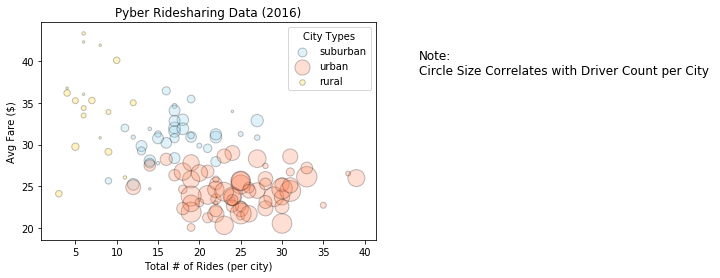

In [3]:
#Organize data by city into one dataframe
avgfare = data.groupby(['type','city']).mean()[['fare']]
chartdata = pd.merge(pd.merge(avgfare,ridesbycity,on='city'),citydata,on='city')
chartdata.rename(columns={'type_x':'rides','type_y':'type'}, inplace=True)

#create three dataframes for each city type
urban = chartdata.loc[chartdata['type'] == 'Urban']
rural = chartdata.loc[chartdata['type'] == 'Rural']
suburban = chartdata.loc[chartdata['type'] == 'Suburban']

# Build the scatter plots for each city types
plt.scatter(suburban['rides'], suburban['fare'], marker="o", facecolors="SkyBlue", edgecolors="black",
            s=suburban['driver_count']*6, alpha=.25,label="suburban")
plt.scatter(urban['rides'], urban['fare'], marker="o", facecolors="Coral", edgecolors="black",
            s=urban['driver_count']*6, alpha=.25,label="urban")
plt.scatter(rural['rides'], rural['fare'], marker="o", facecolors="Gold", edgecolors="black",
            s=rural['driver_count']*6, alpha=.25,label="rural")


# Incorporate the other graph properties
plt.title("Pyber Ridesharing Data (2016)")
plt.xlabel("Total # of Rides (per city)")
plt.ylabel("Avg Fare ($)")

# Create a legend
plt.legend(loc=1,title="City Types")

# Incorporate a text label regarding circle size
plt.figtext(1, .7,"Note:\n Circle Size Correlates with Driver Count per City", wrap=True,
            horizontalalignment='left', fontsize=12)

# Save Figure
plt.savefig("PyberBubbleChart.png")

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

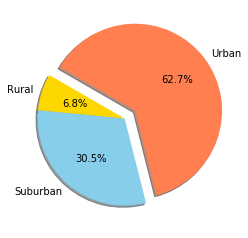

In [5]:
# Calculate Type Percents
totalfare = data.groupby(['type']).sum()[['fare']]

#set list for colors
colors = ['Gold','SkyBlue','Coral']
explode = (0,0,.15)

# Build Pie Chart
plt.pie(totalfare['fare'], explode=explode, labels=totalfare.index.values, 
        colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("PyberPie1.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

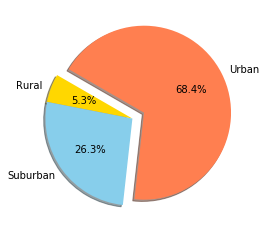

In [7]:
# Calculate Ride Percents
totalrides = chartdata.groupby(['type']).sum()[['rides']]
totalrides

# Build Pie Chart
plt.pie(totalrides['rides'], explode=explode, labels=totalrides.index.values, 
        colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("PyberPie2.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

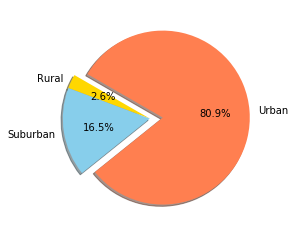

In [9]:
# Calculate Driver Percents
totaldrivers = chartdata.groupby(['type']).sum()[['driver_count']]
totaldrivers

# Build Pie Chart
plt.pie(totaldrivers['driver_count'], explode=explode, labels=totaldrivers.index.values, 
        colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)

#save Figure
plt.savefig("PyberPie3.png")

In [10]:
# Show Figure
plt.show()